Bienvenidos a este pequeño Notebook con algunos datos random del futbolista argentino Leo Messi los últimos 20 años. Antes de nada NO SOY CULÉ, soy ché (por suerte o por desgracia), pero en la "pelea" por ser el mejor de la historia (la cabra), soy team Leo.

Voy a empezar cargando lo necesario para la lectura y visualización de los datos, para luego cargar el dataset de Kaggle, y pasar el .zip resultante a .csv

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install -q kaggle

ERROR: Operation cancelled by user


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tonifauravidaurre","key":"81fd50cfbd8e395cda11859c930e3c48"}'}

In [260]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d azminetoushikwasi/-lionel-messi-all-club-goals
!unzip lionel-messi-all-club-goals.zip

  0% 0.00/11.4k [00:00<?, ?B/s]
100% 11.4k/11.4k [00:00<00:00, 27.6MB/s]


In [282]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,22/23,Ligue 1,21,2/1/23,A,Paris Saint-Germain,Montpellier HSC,1:3,SS,72,0:2,Left-footed shot,Fabián Ruiz
700,22/23,Ligue 1,22,2/4/23,H,Paris Saint-Germain,FC Toulouse,2:1,SS,58,2:1,Left-footed shot,Achraf Hakimi
701,22/23,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:3,CF,90+5,4:3,Direct free kick,\t
702,22/23,Ligue 1,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:3,CF,29,0:2,Right-footed shot,Kylian Mbappé


Imprimo las 5 primeras y ultimas filas para observar los datos disponibles y ver como llevar a cabo nuestro analisis.

In [283]:
df.dtypes

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute              object
At_score            object
Type                object
Goal_assist         object
dtype: object

Aqui vemos el tipo de datos con los que estamos trabajando, y si hace falta realizar alguna transformación. En este caso sí, vamos a necesitar la variable "Minute" como float y no como object, asi que realizamos la transformación...

...pero antes vemos que arroja valores como 90+2, 90+4; representando el tiempo de descuento de la segunda parte, por lo que vamos a transformar cualquier 90 + 'x' a 90 para poder realizar la transformación:

In [ ]:
df['Minute'] = df['Minute'].apply(lambda x: x.split('+')[0] if '+' in x else x)
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,22/23,Ligue 1,21,2/1/23,A,Paris Saint-Germain,Montpellier HSC,1:3,SS,72,0:2,Left-footed shot,Fabián Ruiz
700,22/23,Ligue 1,22,2/4/23,H,Paris Saint-Germain,FC Toulouse,2:1,SS,58,2:1,Left-footed shot,Achraf Hakimi
701,22/23,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:3,CF,90,4:3,Direct free kick,\t
702,22/23,Ligue 1,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:3,CF,29,0:2,Right-footed shot,Kylian Mbappé


Ahora si, podemos llevar a cabo la transformación

In [ ]:
df['Minute'] = df['Minute'].astype('float64')

In [ ]:
df.dtypes

Season               object
Competition          object
Matchday             object
Date                 object
Venue                object
Club                 object
Opponent             object
Result               object
Playing_Position     object
Minute              float64
At_score             object
Type                 object
Goal_assist          object
dtype: object

Perfecto, podemos empezar el analisis.
Primero vamos a ver graficamente cual es el tramo de partido en el que mas goles ha anotado.

In [ ]:
bins = [0, 15, 30, 45, 60, 75, 90]

In [ ]:
labels = ['1-15', '16-30', '31-45', '46-60', '61-75', '76-90']

Para esto, vamos a dividir los 90' en intervalos de 15 minutos. Tres en la 1a parte y tres en la 2a.

In [ ]:
df['intervalo'] = pd.cut(df['Minute'], bins=bins, labels=labels, include_lowest=True, right=False)

conteo_goles_por_intervalo = df['intervalo'].value_counts()
print(conteo_goles_por_intervalo)

76-90    143
61-75    119
16-30    117
31-45    117
46-60    110
1-15      58
Name: intervalo, dtype: int64


Aqui tenemos nuestros goles por intervalo, ordenamos por minuto y no por número de goles, definimos X e Y, y graficamos:

In [ ]:
# Reordena el DataFrame según el orden de las etiquetas
conteo_goles_por_intervalo = conteo_goles_por_intervalo.reindex(labels)

In [ ]:
# Define las variables X e Y
X = conteo_goles_por_intervalo.index  # Intervalos de tiempo
Y = conteo_goles_por_intervalo.values  # Número de goles en cada intervalo

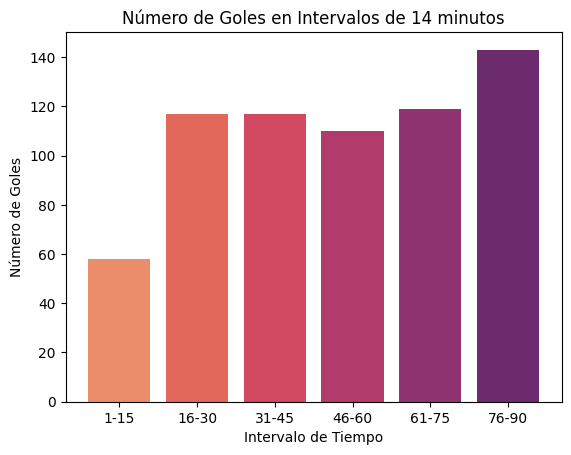

In [ ]:
colores_flare = sns.color_palette("flare", n_colors=len(conteo_goles_por_intervalo))

plt.bar(conteo_goles_por_intervalo.index, conteo_goles_por_intervalo.values, color=colores_flare)
plt.xlabel('Intervalo de Tiempo')
plt.ylabel('Número de Goles')
plt.title('Número de Goles en Intervalos de 14 minutos')
plt.show()

Aqui podemos obervar que en todos los intervalos ha anotado el doble (o casi) de goles que en los primeros 15 minutos de juego, siendo el último cuarto su favorito para anotar con diferencia.

Vamos a otra cosa... ahora vamos a comprobar si Leo suele anotar cuando el marcador está a favor, cuando estan en tablas, o cuando su equipo va perdiendo.

Vamos a utilizar la variable 'At_score'. Para ello tenemos que separar los valores en dos (2:0), delante y detras del ':'

In [262]:
def clasificar_resultado(row):
    resultado_cuando_anota = row['At_score']
    goles_local, goles_visitante = map(int, resultado_cuando_anota.split(':'))

    if goles_local > goles_visitante:
        return 'Ganando'
    elif goles_local < goles_visitante:
        return 'Perdiendo'
    else:
        return 'Empatando'

In [263]:
df['resultado_cuando_anota'] = df.apply(clasificar_resultado, axis=1)
conteo_resultados = df['resultado_cuando_anota'].value_counts()

(-1.099999128928934,
 1.0999993596182316,
 -1.099999846648749,
 1.0999999926975594)

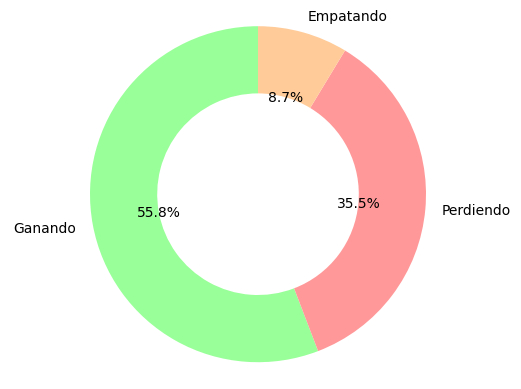

In [264]:
colores = ['#99ff99', '#ff9999', '#ffcc99']
fig, ax = plt.subplots()
ax.pie(conteo_resultados, labels=conteo_resultados.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colores)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Aqui podemos ver en una grafica 'donut' que poco mas de 1/3 de sus goles vienen en situaciones en las que su equipo se encuentra por debajo en el marcador, mientras que más de la mitad cuando el resultado le sirve para conseguir la victoria, (posible argumento para los pechofriistas)

A continuación vamos a comparar los goles anotados en Liga y en Champions desde la temporada 2004-05 a la 2020-21.

In [279]:
valores_unicos_competition = df['Competition'].unique()

In [280]:
df = df.iloc[:-32]
df_filtrado = df[df['Competition'].isin(['LaLiga', 'UEFA Champions League'])]

Aqui excluyo las últimas 32 filas ya que ya no son datos de Leo en el FC Barcelona, ya que contar con su etapa en el club Parisino podría distrsionar el resultado.

<Axes: xlabel='Season'>

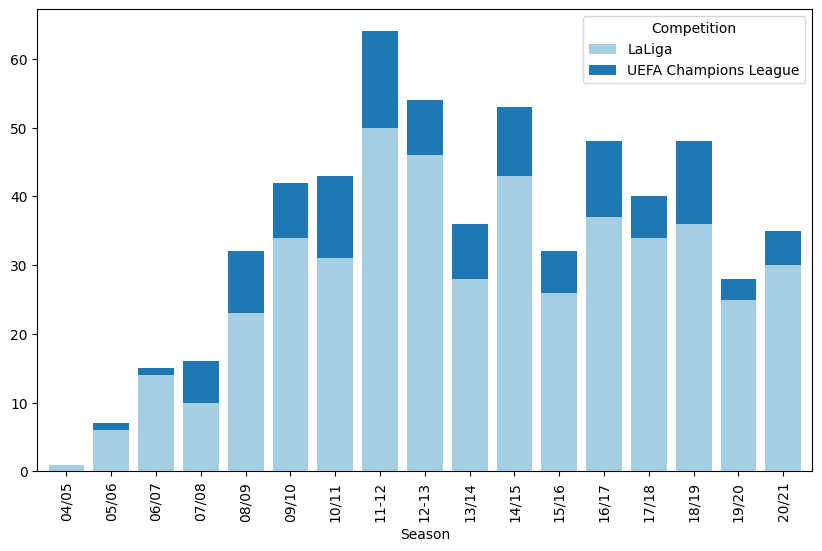

In [281]:
colores_dual = sns.color_palette("Paired", len(df_contado.columns))
fig, ax = plt.subplots(figsize=(10, 6))
df_contado.plot(kind='bar', ax=ax, stacked=True, width=0.8, color=colores_dual)

Los datos arrojados desde la temporada 2007-08 hasta la 2020-21 para la UEFA Champions League serían válidos en este caso ya que en estos años su equipo el FC Barcelona, quedó siempre entre cuartos de final, semis, y final por lo que la diferencia en el numero de partidos entre temporada no es grande. Respecto a la liga, se ve la alta tendencia goleadora de Leo, exceptuando temporadas como la 2013/14, cuando se le acusaba (con razón) de no rendir al 100% por "cuidarse" para el mundial de Brasil 2014.

Por último, vamos a ver gráficamente cuales son las porterías favoritas de Leo; a que equipos les ha marcado más goles (esperemos que el Valencia no esté en el top3 aunque me da que sí)...

In [277]:
df['Goles'] = 1
goles_por_oponente = df.groupby('Opponent')['Goles'].sum()
top_20_oponentes = goles_por_oponente.nlargest(20)

<ipython-input-277-6df9fb6a19af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Goles'] = 1


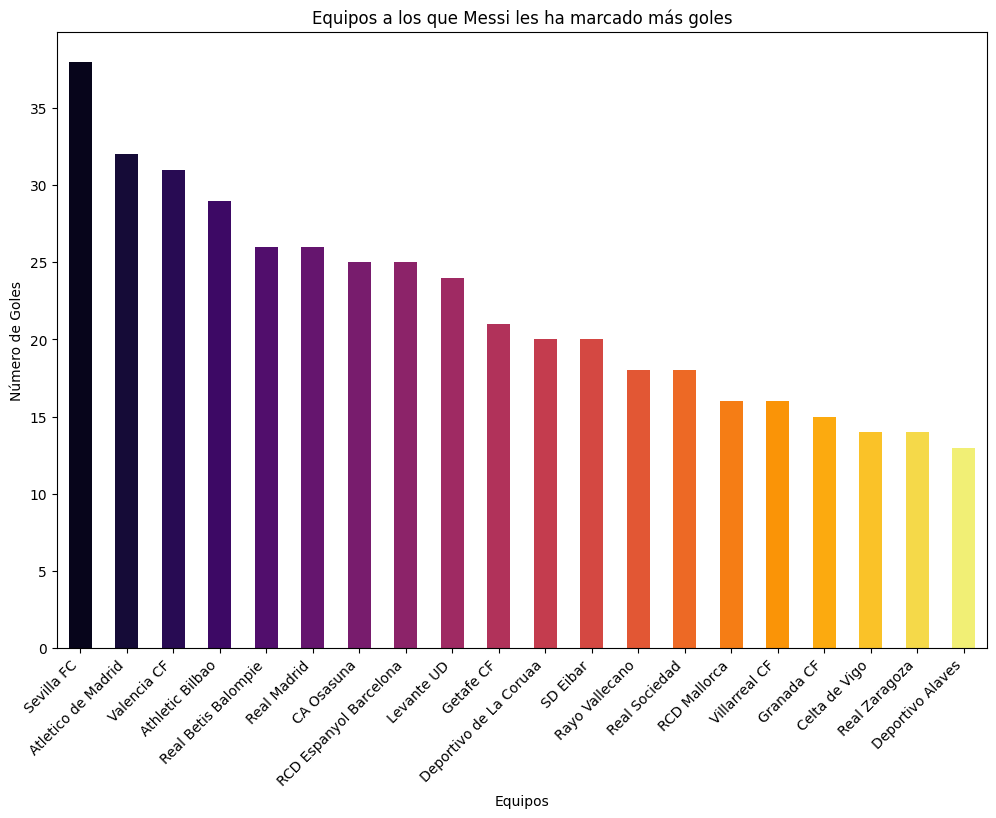

In [284]:
colores = sns.color_palette("inferno", n_colors=len(top_20_oponentes))
fig, ax = plt.subplots(figsize=(12, 8))
top_20_oponentes.plot(kind='bar', ax=ax, color=colores)

plt.title('Equipos a los que Messi les ha marcado más goles')
plt.xlabel('Equipos')
plt.ylabel('Número de Goles')
plt.xticks(rotation=45, ha='right')

plt.show()

...bueno, por lo menos no es el top1. Aqui vemos que el equipo que más goles a recibido del argentino es el Sevilla, seguido por el Atlético, el Valencia, Athletic, Betis y Real Madrid, que ocupa la 6a posición con más de 10 goles menos que el conjunto de Nervión.